<a href="https://colab.research.google.com/github/mahmoud0alabsi/ProgressSoft-Problems/blob/main/Problem-2_FaceMaskDetection/Problem_2_FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
# !pip install --upgrade pip
# !pip install tensorflow

In [3]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Input,MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from keras import callbacks
import cv2
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import classification_report


# Import Data

**Data source : Kaggle ('https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset')**

* Train set size: **800** (With mask)    **800** (Without mask)

* Validate set size: **400** (With mask)    **400** (Without mask)

* Test set size: **483** (With mask)    **509** (Without mask)


In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
                '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Train/',
                image_size=(150, 150)
                )

Found 1600 files belonging to 2 classes.


In [5]:
vald_data = tf.keras.utils.image_dataset_from_directory(
        '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Validation',
        image_size=(150, 150)
        )

Found 800 files belonging to 2 classes.


In [6]:
test_data = tf.keras.utils.image_dataset_from_directory(
            '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Test',
            image_size=(150, 150)
            )

Found 992 files belonging to 2 classes.


# Display some images

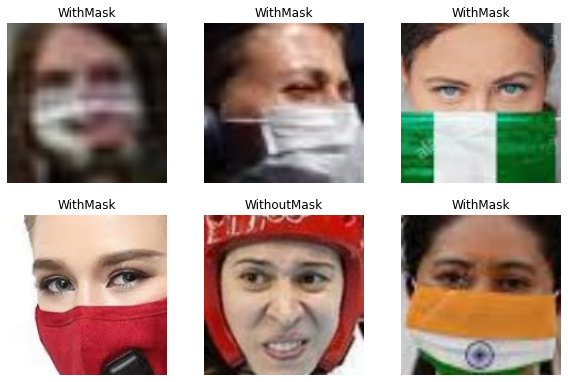

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")


In [8]:
# train_data shape
for image_batch, labels_batch in train_data:
  print(image_batch.shape, '   (batch_size , hight , width , channel "RGB")')
  print(labels_batch.shape, '               (batch_size)')
  break

(32, 150, 150, 3)    (batch_size , hight , width , channel "RGB")
(32,)                (batch_size)


# Build Model

In [9]:
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    shear_range=0.2,
                                    rescale= 1./255,
                                    zoom_range=0.2)

train_path = '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Train'  #Training data path
train_generator = train_datagen.flow_from_directory(
                                        train_path,
                                        target_size=(150,150),
                                        batch_size=32,
                                        shuffle = True,
                                        seed = 42,
                                        class_mode = "categorical",
                                        classes = ['WithMask','WithoutMask'])


validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_path = '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Validation'   #validation data path
validation_generator = validation_datagen.flow_from_directory(
                                              validation_path,
                                              target_size=(150,150),
                                              seed = 42,
                                              shuffle = True,
                                              batch_size=32,
                                              class_mode = "categorical",
                                             classes = ['WithMask','WithoutMask'])


test_datagen = ImageDataGenerator(rescale=1.0/255)
test_path = '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Test'   #Testing data path
test_generator = test_datagen.flow_from_directory(
                                              test_path,
                                              target_size=(150,150),
                                              seed = 42,
                                              shuffle = False,
                                              batch_size=32,
                                              class_mode = "categorical",
                                              classes = ['WithMask','WithoutMask'])

Found 1600 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


### CNN model

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',strides=2 ,input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',strides=2),
    tf.keras.layers.MaxPooling2D(2,2),
      
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [28]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [29]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 6, 
                                        restore_best_weights = True, verbose=1)

In [31]:
history = model.fit_generator(
              train_generator,
              epochs=30,
              validation_data=validation_generator,
              callbacks =[earlystopping])

<ipython-input-31-5b4c9b13725e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
50/50 [==============================] - 14s 281ms/step - loss: 0.1831 - acc: 0.9281 - val_loss: 0.1155 - val_acc: 0.9625
Epoch 2/30
50/50 [==============================] - 14s 282ms/step - loss: 0.1458 - acc: 0.9513 - val_loss: 0.1301 - val_acc: 0.9525
Epoch 3/30
50/50 [==============================] - 14s 280ms/step - loss: 0.1133 - acc: 0.9556 - val_loss: 0.1033 - val_acc: 0.9663
Epoch 4/30
50/50 [==============================] - 14s 277ms/step - loss: 0.1008 - acc: 0.9656 - val_loss: 0.0884 - val_acc: 0.9725
Epoch 5/30
50/50 [==============================] - 14s 274ms/step - loss: 0.0912 - acc: 0.9694 - val_loss: 0.0653 - val_acc: 0.9762
Epoch 6/30
50/50 [==============================] - 14s 276ms/step - loss: 0.0688 - acc: 0.9775 - val_loss: 0.0409 - val_acc: 0.9862
Epoch 7/30
50/50 [==============================] - 16s 326ms/step - loss: 0.0650 - acc: 0.9775 - val_loss: 0.0587 - val_acc: 0.9825
Epoch 8/30
50/50 [==============================] - 14s 282ms/step - 

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 20736)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               2654336   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                      

###Evaluate model

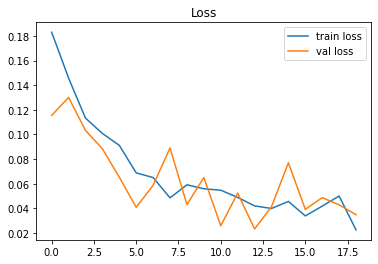

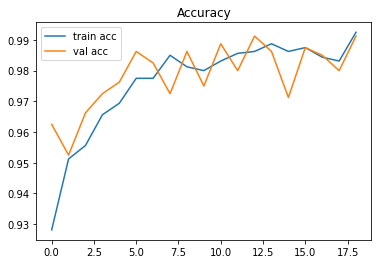

In [35]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

### Evaluate using test data set

In [36]:
cnn_eval = model.evaluate(test_generator)    #0.9698  #0.9728

31/31 [==============================] - 460s 15s/step - loss: 0.0338 - acc: 0.9859


**Confusion matrix**

In [37]:
test_pred = model.predict(test_generator)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_generator.labels

31/31 [==============================] - 6s 176ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

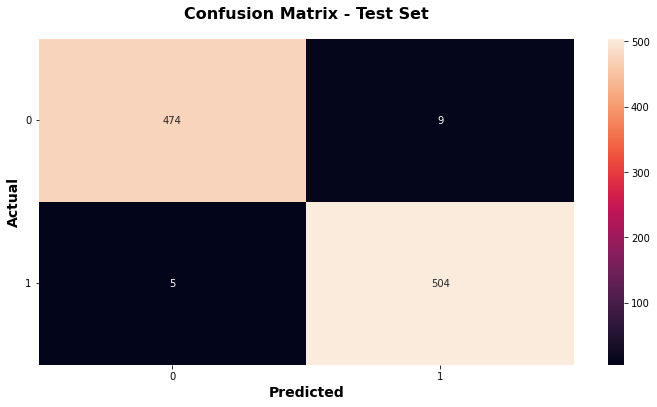

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

### Model accuracy

In [39]:
Y_pred = model.predict(test_generator, test_generator.samples / 32)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_generator.classes
print(classification_report(val_trues, val_preds))

31/31 [==============================] - 3s 93ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       483
           1       0.98      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



## Save model

In [40]:
model.save('/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/face_mask_model.h5')

# Test model

## Load Pre-Trained model

In [41]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/face_mask_model.h5')

In [42]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 20736)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               2654336   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                      

## Test & Predict 

In [43]:
classes = train_data.class_names

In [44]:
def predict_image(path):
  image = tf.keras.utils.load_img(path, target_size=(150, 150))
  input_arr = tf.keras.utils.img_to_array(image)
  img_batch = np.expand_dims(input_arr, axis=0)
  y = model.predict(img_batch);
  res = classes[y.argmax()]
  plt.imshow(image)
  plt.xlabel(res, fontsize=18)
  plt.show();


1/1 [==============================] - 0s 122ms/step


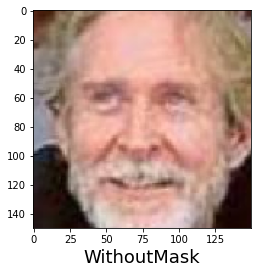

1/1 [==============================] - 0s 20ms/step


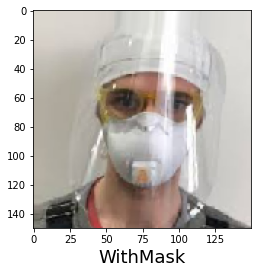

1/1 [==============================] - 0s 18ms/step


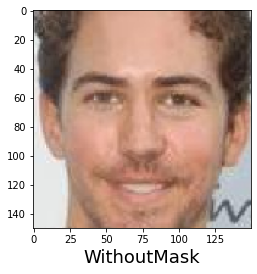

1/1 [==============================] - 0s 18ms/step


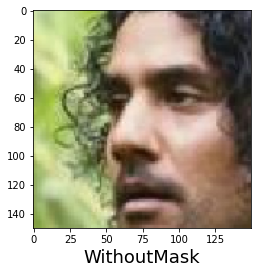

1/1 [==============================] - 0s 21ms/step


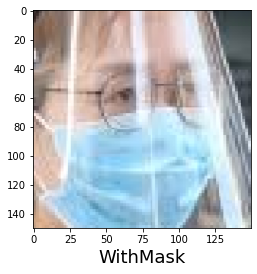

1/1 [==============================] - 0s 21ms/step


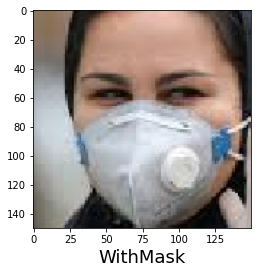

1/1 [==============================] - 0s 18ms/step


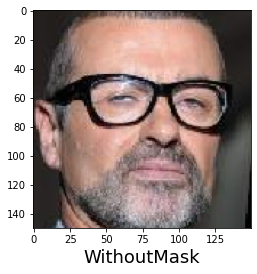

1/1 [==============================] - 0s 18ms/step


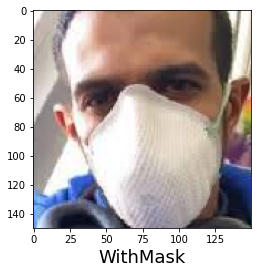

1/1 [==============================] - 0s 21ms/step


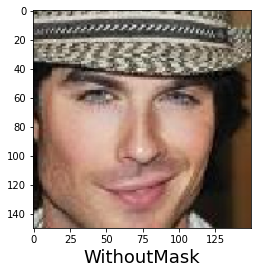

1/1 [==============================] - 0s 20ms/step


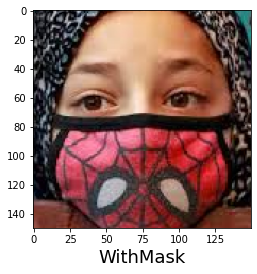

In [45]:
paths = ['/content/152.png','/content/255.png', '/content/85.png',
         '/content/193.png', '/content/742.png', '/content/392.png',
         '/content/51.png', '/content/79.png', '/content/386.png','/content/86.png']

for path in paths:
  plt.figure(figsize=(4,4))
  predict_image(path) 

# Final

In [46]:
Y_pred = new_model.predict(test_generator, test_generator.samples / 32)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_generator.classes
print(classification_report(val_trues, val_preds))

31/31 [==============================] - 3s 93ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       483
           1       0.98      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



# Model accuracy

**Training acc = 99.25%**

**Testing acc = 98.59%**